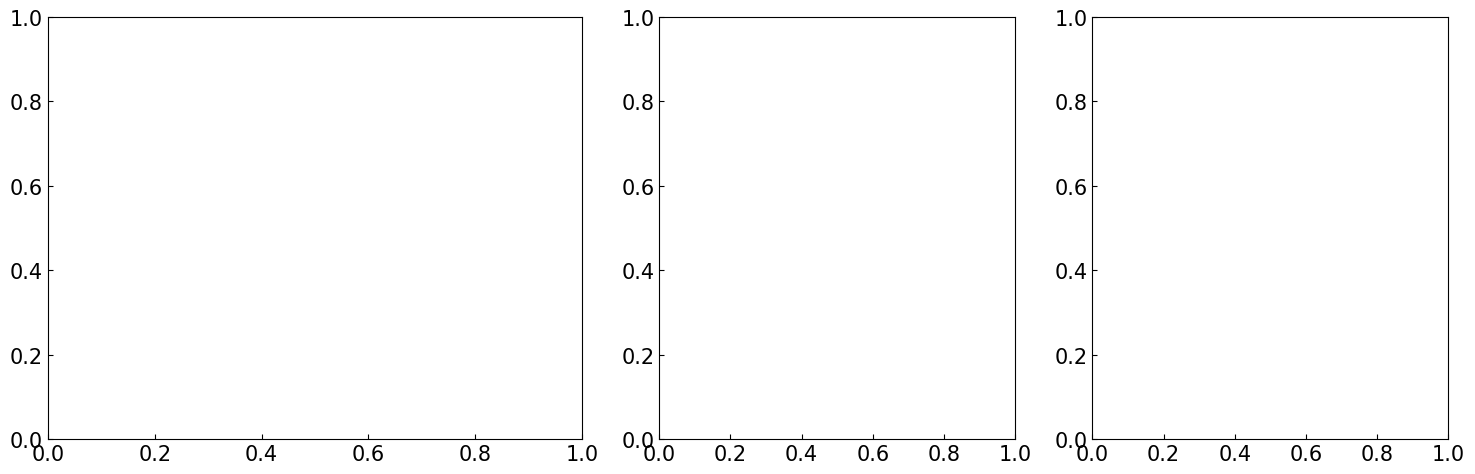

In [1]:
import sys
import matplotlib.pyplot as plt
from tqdm import tqdm

sys.path.append("../src/")

from fLe_timecrystal import fle
import plot_utils as pu
from plot import *

plt.style.use("plot_style.mplstyle")
data_path = "../_raw/time_crystal/"
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
fig, ax = plt.subplots(1,3, figsize=(15, 5), sharex = False, gridspec_kw={'width_ratios': [1.5, 1, 1]});
avg = 4000
task_set = ["001", "002", "003", "004"]

alpha = [0.05, 0.1, 0.3, 0.5, 0.7, 0.9]

In [2]:
axi = ax[0]

T = 20
h = 0.05
v0 = 1.0
M = 1.0
eta_1 = 1.0
eta_2 = 1.0
T1 = 1.0
T2 = 1.0

linear = 1

for i, a in enumerate(tqdm(alpha)):
    eq = fle(a, linear)
    eq.params(T = T, h = h,
            v0 = v0, M = M,
            eta_1 = eta_1, eta_2 = eta_2,
            T1 = T1, T2 = T2)
    plot_position(eq, axi, 
                  color_fd = colors[9 - i])

axi.set_xlim(xmin = 0, xmax = 17.5)
axi.set_xlabel("Time "+r"$t$")
axi.set_ylabel("Position "+r"$x(t)$")
pu.add_caption_letter(axi, "(a)")

  0%|          | 0/6 [00:00<?, ?it/s]/home/dsquevedovega/anaconda3/envs/dev_phys/lib/python3.9/site-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 17%|█▋        | 1/6 [00:32<02:44, 32.89s/it]/home/dsquevedovega/anaconda3/envs/dev_phys/lib/python3.9/site-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
100%|██████████| 6/6 [03:19<00:00, 33.33s/it]


In [3]:
axi = ax[1]

T = 100
h = 0.05
v0 = 1.0
M = 1.0
eta_1 = 1.0
eta_2 = 1.0
T1 = 1.0
T2 = 1.0

linear = 1
legend_anl = False
for i, a in enumerate(tqdm(alpha)):
    eq = fle(a, linear)
    eq.params(T = T, h = h,
             v0 = v0, M = M,
             eta_1 = eta_1, eta_2 = eta_2,
             T1 = T1, T2 = T2)
    if a == alpha[-1]:
        legend_anl = True
    plot_msd(eq = eq, avg = avg, task_set = task_set, data_path = data_path, 
             ax = axi, color_fd = colors[9 - i], analytical = True, T = 20, h = 0.1,
             legend_main = True, legend_second = legend_anl)

axi.set_xlim(xmin = 0, xmax = 17.5)
axi.set_ylim(ymin = 0, ymax = 17.5)
axi.set_ylabel("MSD " r"$\langle x^2 (t) \rangle$")
axi.set_xlabel("Time "+"$t$")

handles, labels = axi.get_legend_handles_labels()
axi.get_legend().remove()

pu.add_caption_letter(axi, "(b)")

  0%|          | 0/6 [00:00<?, ?it/s]

Computing analytical....


/home/dsquevedovega/anaconda3/envs/dev_phys/lib/python3.9/site-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(
 17%|█▋        | 1/6 [00:10<00:52, 10.48s/it]

Computing analytical....


/home/dsquevedovega/anaconda3/envs/dev_phys/lib/python3.9/site-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(
 33%|███▎      | 2/6 [00:20<00:41, 10.27s/it]

Computing analytical....


 50%|█████     | 3/6 [00:30<00:30, 10.26s/it]

Computing analytical....


 67%|██████▋   | 4/6 [00:41<00:20, 10.28s/it]

Computing analytical....


 83%|████████▎ | 5/6 [00:51<00:10, 10.21s/it]

Computing analytical....


100%|██████████| 6/6 [01:01<00:00, 10.24s/it]


In [4]:
axi = ax[2]

T = 100
h = 0.05
v0 = 1.0
M = 1.0
eta_1 = 1.0
eta_2 = 1.0
T1 = 1.0
T2 = 1.0

linear = 0
for i, a in enumerate(tqdm(alpha)):
    eq = fle(a, linear)
    eq.params(T = T, h = h,
              v0 = v0, M = M,
              eta_1 = eta_1, eta_2 = eta_2,
              T1 = T1, T2 = T2)
    plot_msd(eq = eq, avg = avg, task_set = task_set, data_path = data_path, 
             ax = axi, color_fd = colors[9 - i])
    if i == 0:
        add_trend(axi, x0 = 1, xf = T, func = talpha, text = r"$~t^{\alpha}$", xtext = 30, dy = -0.7, alpha = a)
    else:
        add_trend(axi, x0 = 1, xf = T, func = talpha, alpha = a)

add_trend(axi, x0 = h, xf = 100, func = t, text = "~t", xtext = 0.1)
add_trend(axi, x0 = h, xf = 1, func = t2, text = "~t²", xtext = 0.1)
add_trend(axi, x0 = h, xf = 1, func = t3, text = "~t³", xtext = 0.1)

axi.set_xscale("log")
axi.set_yscale("log")
axi.set_ylabel("MSD " r"$\langle x^2 (t) \rangle$")
axi.set_xlabel("Time "+"$t$")
axi.set_xlim(xmin = h, xmax = 100)

pu.add_caption_letter(axi, "(c)")

 17%|█▋        | 1/6 [00:01<00:06,  1.31s/it]

Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 33%|███▎      | 2/6 [00:02<00:05,  1.27s/it]

Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 50%|█████     | 3/6 [00:03<00:03,  1.23s/it]

Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 67%|██████▋   | 4/6 [00:04<00:02,  1.23s/it]

Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 83%|████████▎ | 5/6 [00:06<00:01,  1.24s/it]

Computing analytical....
No analytical solution


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
100%|██████████| 6/6 [00:07<00:00,  1.23s/it]

Computing analytical....
No analytical solution


In [5]:
fig.legend(handles, labels, bbox_to_anchor = (0.9, 1.1), ncol = 7)
fig.tight_layout()

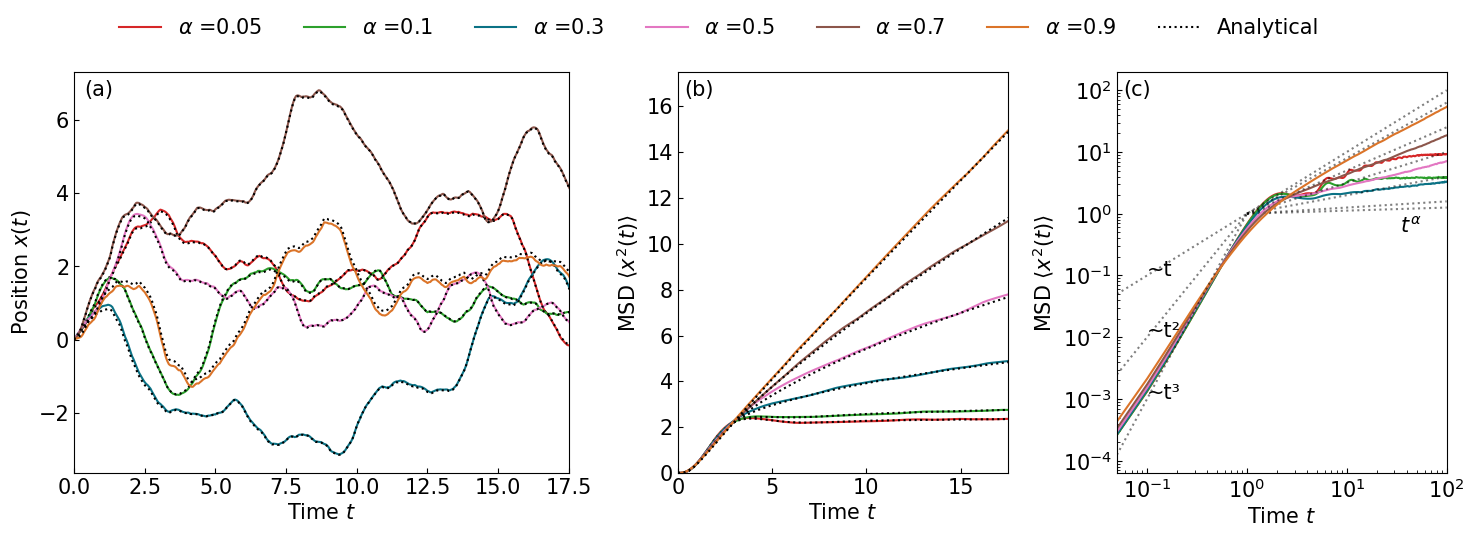

In [6]:
fig

In [7]:
fig.savefig("../outs/fig1.png", dpi = 200)
fig.savefig("../outs/fig1_500dpi.png", dpi = 500)
fig.savefig("../outs/fig1_1000dpi.png", dpi = 1000)